In [122]:
import pandas as pd
import torch
import torch.nn as nn
from sklearn.preprocessing import StandardScaler
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim


df=pd.read_csv('./data/051910.csv',index_col=0).reset_index(drop=True)
# df=pd.read_csv('./data/215600.csv',index_col=0).reset_index(drop=True)
code_name=pd.read_csv('./data/code_name.csv')
train=df[['open','high','low','volume']]
target=df[['close']]

In [123]:
def preprocessing(data):
    
    scaler= StandardScaler()
    data=scaler.fit_transform(data)
    data=np.array(data)
    
    return data,scaler
    
def split_data(data):
    
    prop=len(data)//5
    val=data[:prop]
    test=data[prop+1:2*prop]
    train=data[2*prop:]
    
    return np.array(train),np.array(val),np.array(test)

def make_seq(data,window_size):
    seq_data=[]
    for i in range(data.shape[0]-window_size):
        L=data[i:i+window_size]
        seq_data.append(L)
    return seq_data

In [124]:
train_data_normalized,scaler_train = preprocessing(train.iloc[:-1])
target_data_normalized ,scaler_test= preprocessing(target.iloc[1:])

train_seq=make_seq(train_data_normalized,window_size=5)
target_seq=make_seq(target_data_normalized,window_size=5)

x_train,x_val,x_test=split_data(train_seq)
y_train,y_val,y_test=split_data(target_seq)

In [149]:
class stock_net(nn.Module):
    def __init__(self, embedding_dim, hidden_dim):
        
        super(stock_net, self).__init__()
        self.lstm = nn.LSTM(embedding_dim, hidden_dim)
        self.h_o=nn.Linear(hidden_dim,1)
        self.relu = nn.ReLU()
        
    def forward(self,x):
        
        x=self.lstm(x)
        x=self.relu(self.h_o(x[0]))
        
        return x

In [150]:
emb_dim=x_train.shape[2] # feature size

In [151]:
haha_net=stock_net(emb_dim,10)
criterion = nn.MSELoss()
# Optimizer를 생성합니다.
optimizer = optim.SGD(haha_net.parameters(), lr=0.01)

In [152]:
Loss=[]
for i in range(x_train.shape[0]):

    optimizer.zero_grad()
    output=haha_net(torch.FloatTensor(x_train[i]).view(5,-1,4))
    loss = criterion(output, torch.FloatTensor(y_train[i]))
    loss.backward()
    optimizer.step()  
    if i%100==0:
        Loss.append(loss.item())
        print(loss.item())

0.7568060755729675
0.6580135822296143
0.11120356619358063
0.0425124391913414
0.309242308139801
0.820602536201477
2.060643434524536
2.171931028366089
0.010836118832230568
0.06052194908261299
0.005134772974997759
0.01587410643696785
0.010863103903830051
0.0029578579124063253
0.0003407425538171083
0.08591717481613159
0.004084575455635786
0.013779815286397934
0.00940052978694439
0.012775103561580181
0.0009160667541436851
0.009807946160435677
0.05979776009917259
0.049679338932037354
0.016012845560908318
0.005062098614871502
0.008639119565486908
0.0016583845717832446


In [153]:
Prediction=[]
for i in x_test:
    prediction=haha_net(torch.FloatTensor(i).view(5,-1,4))
    Prediction.append(prediction.view(-1).detach().numpy())

In [154]:
Prediction=np.array(Prediction).reshape(-1)

In [155]:
prediction=scaler_test.inverse_transform(Prediction.reshape(-1,1))
real=scaler_test.inverse_transform(y_test.reshape(-1,1))

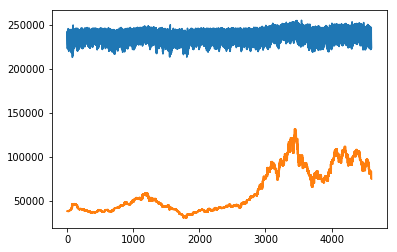

In [159]:
import matplotlib.pyplot as plt

plt.plot(prediction)
plt.plot(real)

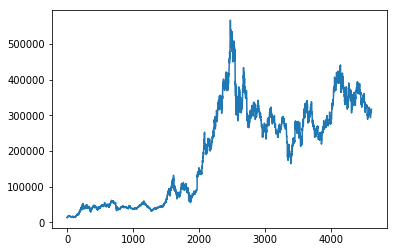

In [163]:
plt.plot(target)